In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from patsy import dmatrices
import warnings 
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('./csv파일/데이터셋_3(심각도).csv',encoding='cp949')

In [14]:
df

,사고유형,연령가해자,법규위반가해자,행동유형가해자,피해자신체상해주부위,차량용도가해자,도로종류,도로형태,도로선형,발생시각,심각도
0,보도통행중,20세이하,그룹1,그룹2,그룹4,그룹5,기타,단일로,평지,낮,0
1,횡단중,65세이상,그룹1,그룹2,그룹5,그룹4,시도,단일로,평지,출퇴근시간,1
2,길가장자리구역통행중,20세이하,그룹1,그룹2,기타/불명,그룹4,시도,단일로,평지,출퇴근시간,0
3,길가장자리구역통행중,21-30세,그룹1,그룹1,기타/불명,그룹1,기타,단일로,평지,낮,1
4,횡단중,41-50세,그룹1,그룹2,그룹5,그룹4,기타,단일로,평지,낮,1
...,...,...,...,...,...,...,...,...,...,...,...
58054,길가장자리구역통행중,51-60세,그룹1,그룹2,그룹2,그룹4,시도,단일로,평지,낮,0
58055,보도통행중,21-30세,기타,그룹1,그룹2,그룹4,군도,교차로,평지,출퇴근시간,0
58056,차도통행중,31-40세,그룹1,그룹2,그룹4,그룹4,군도,단일로,평지,출퇴근시간,1
58057,기타,65세이상,그룹1,그룹2,그룹4,그룹4,시도,단일로,평지,출퇴근시간,1


In [15]:
x=df.drop(['심각도'],axis=1)
x = pd.get_dummies(x)
y=pd.DataFrame(df['심각도'])

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,shuffle=True) 

In [16]:
log = LogisticRegression()
log.fit(x_train,y_train)

y_pred = log.predict(x_test)

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.19      0.28      5805
           1       0.70      0.93      0.80     11613

    accuracy                           0.68     17418
   macro avg       0.63      0.56      0.54     17418
weighted avg       0.66      0.68      0.63     17418



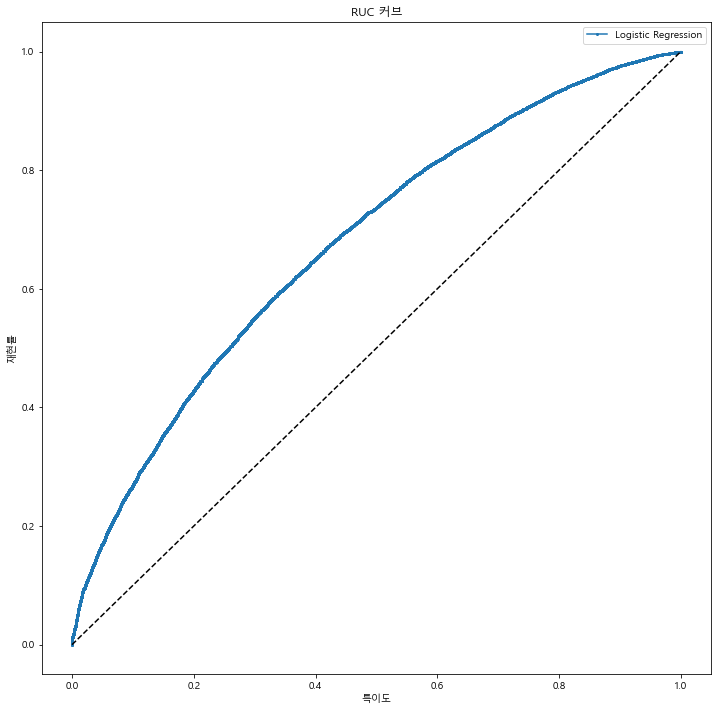

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
rcParams['figure.figsize'] = 12,12


from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


fpr, tpr, threshold = roc_curve(y_train, log.decision_function(x_train))

plt.plot(fpr,tpr, 'o-', ms=2, label="Logistic Regression")
plt.legend()
plt.plot([0,1],[0,1], 'k--',label='radom guess')
plt.xlabel('특이도')
plt.ylabel('재현률')
plt.title('RUC 커브')
plt.show()

#### AUC 값은 0.5~1의 범위를 가지는데 0.5면 성능이 전혀 없음. 1이면 최고의 성능이라고 할 수 있다.

In [19]:
print('AUC: {}'.format(auc(fpr,tpr)))  # 0.5에 가까울 수록 성능이 좋지 못함

AUC: 0.6779638179241154


#### 위 과정을 통해 로지스틱 회귀 모델을 생성하고 평가

In [20]:
import statsmodels.api as sm

logit = sm.Logit(y,x)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.589517
         Iterations 13


In [21]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                    심각도   No. Observations:                58059
Model:                          Logit   Df Residuals:                    58014
Method:                           MLE   Df Model:                           44
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                 0.07083
Time:                        15:03:57   Log-Likelihood:                -34227.
converged:                       True   LL-Null:                       -36836.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
사고유형_기타             -0.0039   9.69e+05  -4.06e-09      1.000    -1.9e+06     1.9e+06
사고유형_길가장자리구역통행중     -0.0653   9.86e+05  -6.63e-08      1.000   -1.93e+06    1.93e+06
사고유형_보도통행중           0.1397 

### 오즈비 확인
#### 독립변수들의 오즈비를 구해보자
#### 오즈비는 1을 기준으로 1보다 크면 심각한사고일 확률이 커지고 1보다 작으면 심각하지 않은 사고 일 확률이 커진다는 것을 나타낸다. 
#### 오즈비가 1 이면 결과에 별다른 영향을 미치지 않는 다고 볼 수 있다.
#### 회귀계수가 변수의 오즈비의 로그값이므로 exp을 취해서 보자

In [22]:
print(np.exp(result.params))

사고유형_기타              0.996077
사고유형_길가장자리구역통행중      0.936753
사고유형_보도통행중           1.149932
사고유형_차도통행중           1.137037
사고유형_횡단중             1.420370
연령가해자_20세이하          1.246310
연령가해자_21-30세         1.241353
연령가해자_31-40세         1.211511
연령가해자_41-50세         1.259840
연령가해자_51-60세         1.210207
연령가해자_61-64세         1.188537
연령가해자_65세이상          1.225302
연령가해자_기타/불명          0.416377
법규위반가해자_그룹1          0.526571
법규위반가해자_그룹2          0.578969
법규위반가해자_그룹3         10.822602
법규위반가해자_기타           0.525197
행동유형가해자_그룹1          1.124162
행동유형가해자_그룹2          1.494452
행동유형가해자_그룹3          1.335637
행동유형가해자_그룹4          0.707310
행동유형가해자_기타/불명        1.091835
피해자신체상해주부위_그룹1       0.342640
피해자신체상해주부위_그룹2       0.559778
피해자신체상해주부위_그룹3       0.920401
피해자신체상해주부위_그룹4       1.379586
피해자신체상해주부위_그룹5       1.944530
피해자신체상해주부위_그룹6       3.424817
피해자신체상해주부위_기타/불명     1.068400
차량용도가해자_그룹1          1.493246
차량용도가해자_그룹2          1.151495
차량용도가해자_그룹3          1.097514
차량용도가해자_그룹4          1.227351
차량용도가해자_그룹

#### 오즈비 1 이 넘지 않는  것 삭제 후 다시

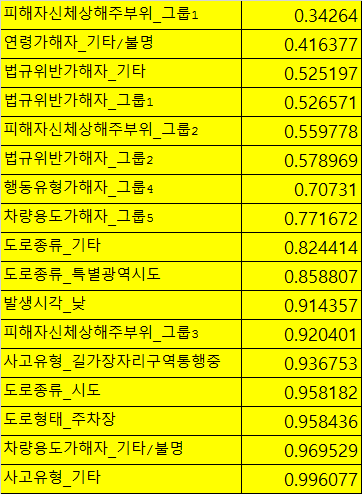

In [24]:
x2 = x.drop(['피해자신체상해주부위_그룹1','연령가해자_기타/불명','법규위반가해자_기타','법규위반가해자_그룹1'
            ,'피해자신체상해주부위_그룹2','법규위반가해자_그룹2','행동유형가해자_그룹4','차량용도가해자_그룹5'
            ,'도로종류_기타','도로종류_특별광역시도','발생시각_낮','피해자신체상해주부위_그룹3','사고유형_길가장자리구역통행중'
            ,'도로종류_시도','도로형태_주차장','차량용도가해자_기타/불명','사고유형_기타'],axis=1)

## 다시 로지스틱 회귀

In [25]:
logit = sm.Logit(y,x2)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.591771
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    심각도   No. Observations:                58059
Model:                          Logit   Df Residuals:                    58022
Method:                           MLE   Df Model:                           36
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                 0.06727
Time:                        15:11:20   Log-Likelihood:                -34358.
converged:                       True   LL-Null:                       -36836.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
사고유형_보도통행중           0.1822      0.047      3.853      0.000       0.090       0.275
사고유형_차도통행중 

## 오즈비 출력

In [26]:
print(np.exp(result.params))

사고유형_보도통행중           1.199854
사고유형_차도통행중           1.157598
사고유형_횡단중             1.503872
연령가해자_20세이하          2.616205
연령가해자_21-30세         2.593893
연령가해자_31-40세         2.538814
연령가해자_41-50세         2.641879
연령가해자_51-60세         2.538348
연령가해자_61-64세         2.487661
연령가해자_65세이상          2.571899
법규위반가해자_그룹3         19.845754
행동유형가해자_그룹1          1.589659
행동유형가해자_그룹2          2.091824
행동유형가해자_그룹3          1.894607
행동유형가해자_기타/불명        1.590636
피해자신체상해주부위_그룹4       1.739542
피해자신체상해주부위_그룹5       2.463641
피해자신체상해주부위_그룹6       4.349547
피해자신체상해주부위_기타/불명     1.352180
차량용도가해자_그룹1          1.916690
차량용도가해자_그룹2          1.501643
차량용도가해자_그룹3          1.389772
차량용도가해자_그룹4          1.581839
도로종류_고속국도            1.736408
도로종류_군도              1.297273
도로종류_일반국도            1.460569
도로종류_지방도             1.269908
도로형태_교차로             1.336079
도로형태_기타/불명           1.247342
도로형태_단일로             1.277896
도로선형_기타/서비스구역        0.084362
도로선형_내리막             0.113041
도로선형_오르막             0.096213
도로선형_평지   

## 오즈비 결과에 따르면 다음 순서로 심각한 사고를 일으킬 확률이 높다.
### 1. 법규위반가해자_그룹3 (19.812178)
#### 그룹3: 과속
### 2. 피해자신체상해주부위_그룹6  (4.353010)
#### 그룹6: 가슴 
### 3. 연령가해자_41-50세 (2.641879)